In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
# always scale down the variables when the model is distance based

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report , accuracy_score,plot_confusion_matrix

import warnings;
warnings.filterwarnings('ignore');
from yellowbrick.classifier import ROCAUC

df=pd.read_csv('QualityPrediction.csv')

<h1>Pre-Processing</h1>

<b>Check For NULL Values in the Dataset</b>

In [2]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<b>Visualize Outliers in all the features:</b>

<function matplotlib.pyplot.show(close=None, block=None)>

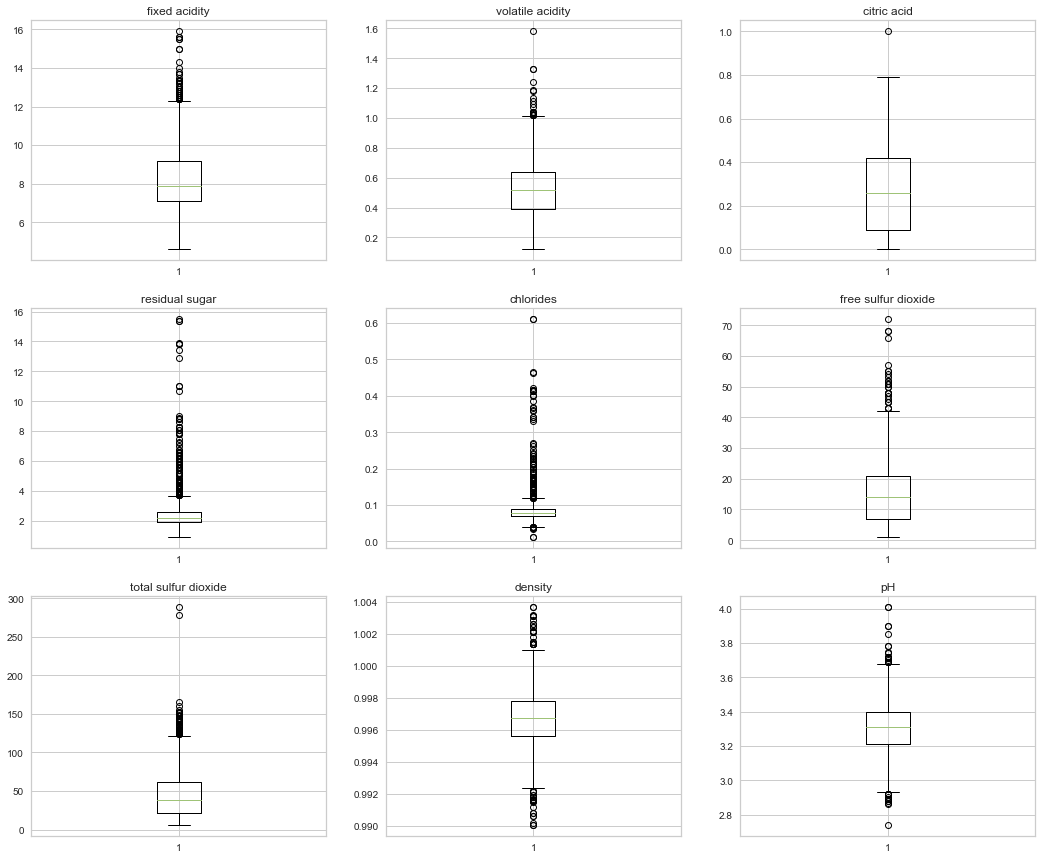

In [26]:
cols1=list(df.columns)
fig,ax=plt.subplots(3,3,figsize=(18,15))
c=0
for i in range(3):
    for j in range(3):
        ax[i,j].boxplot(df[[cols1[c]]])
        ax[i,j].set_title(cols1[c])
        c=c+1
plt.show

<b>Outlier Imputation:</b>

In [27]:
#outliers imputation
def outlierimputation(column):
    q1=df_outlierimputed[column].quantile(0.25)
    q3=df_outlierimputed[column].quantile(0.75)
    IQR=q3-q1
    df_outlierimputed[column] =np.where(df_outlierimputed[column] <(q1-1.5*IQR),q1,df_outlierimputed[column])
    df_outlierimputed[column] =np.where(df_outlierimputed[column] >(q3+1.5*IQR),q3,df_outlierimputed[column])
    return df_outlierimputed

df_outlierimputed=df
df_outlierimputed=outlierimputation('total sulfur dioxide')
df_outlierimputed=outlierimputation('chlorides')
df_outlierimputed=outlierimputation('residual sugar')
df_outlierimputed=outlierimputation('density')
df_outlierimputed=outlierimputation('free sulfur dioxide')
df_outlierimputed=outlierimputation('fixed acidity')
df_outlierimputed=outlierimputation('volatile acidity')
df_outlierimputed=outlierimputation('pH')

<b>Visualize Outliers in all the features after outlier imputation:</b>

<function matplotlib.pyplot.show(close=None, block=None)>

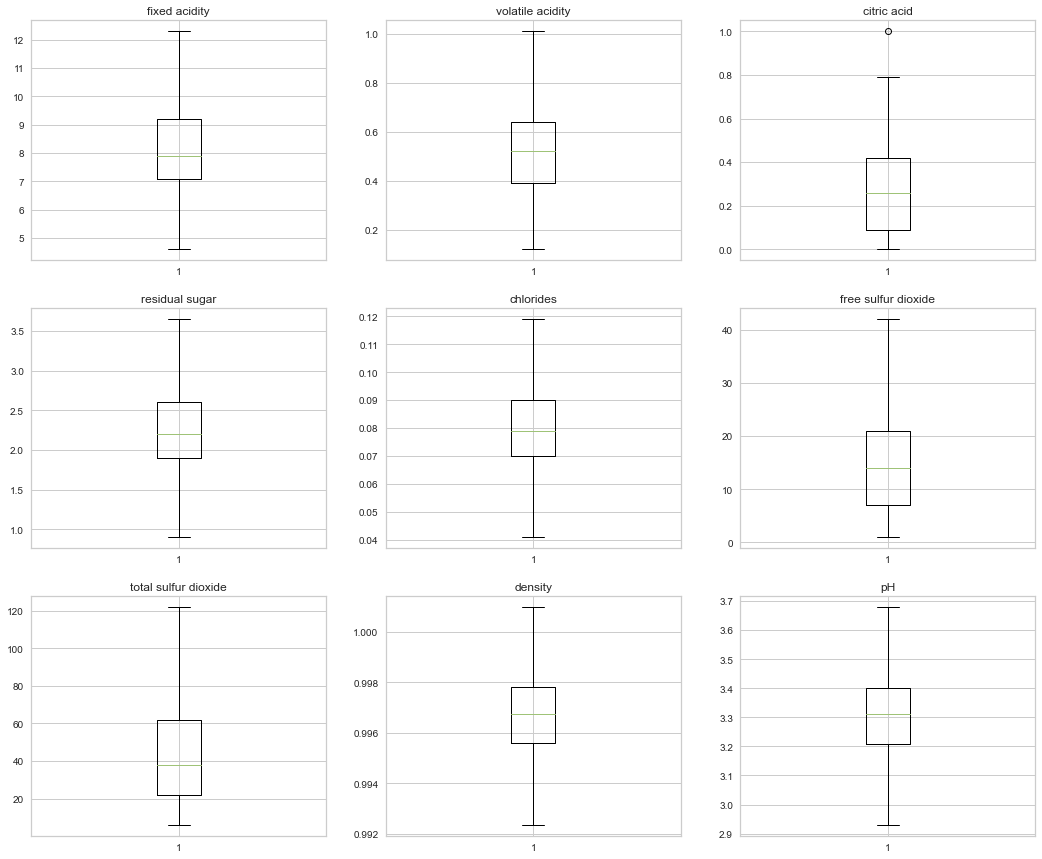

In [28]:
cols1=list(df_outlierimputed.columns)
fig,ax=plt.subplots(3,3,figsize=(18,15))
c=0
for i in range(3):
    for j in range(3):
        ax[i,j].boxplot(df[[cols1[c]]])
        ax[i,j].set_title(cols1[c])
        c=c+1
plt.show

<b>Check for MultiCollinearity:</b>

<AxesSubplot:>

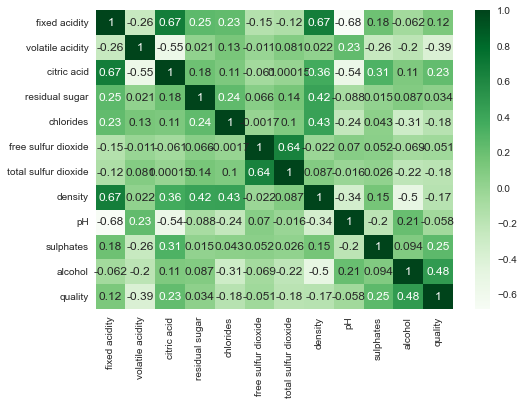

In [6]:
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')

<h1>Logistic Regression:</h1>

In [8]:
def WinePrediction_Log(df):
    # consider all features
    X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].values    #Features / predictors
    Y = df.iloc[:,11].values   #Target variable
    X_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=30)

    #Scaling the independent variables

    standard_Scaler=StandardScaler()
    X_train = standard_Scaler.fit_transform(X_train)   #fit generates the parameters, transform applies 
    x_test = standard_Scaler.transform(x_test)

    log_reg=LogisticRegression(random_state=150)
    log_reg.fit(X_train,y_train)

    y_pred=log_reg.predict(x_test)

    # the confusion matrix 
    from sklearn.metrics import plot_confusion_matrix
    print(plot_confusion_matrix(log_reg,x_test,y_test))

    # sns.heatmap(conf_matrix, annot = True)

    model = LogisticRegression(multi_class="auto", solver="liblinear")
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_facecolor('#fafafa')
    visualizer = ROCAUC(model, ax)
    visualizer.fit(X_train, y_train)        
    auc_lr = visualizer.score(x_test, y_test)       
    print(visualizer.show())

    print(classification_report(y_test,y_pred))

<b>Without Outlier imputation</b>

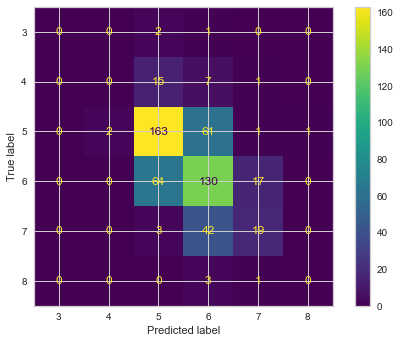

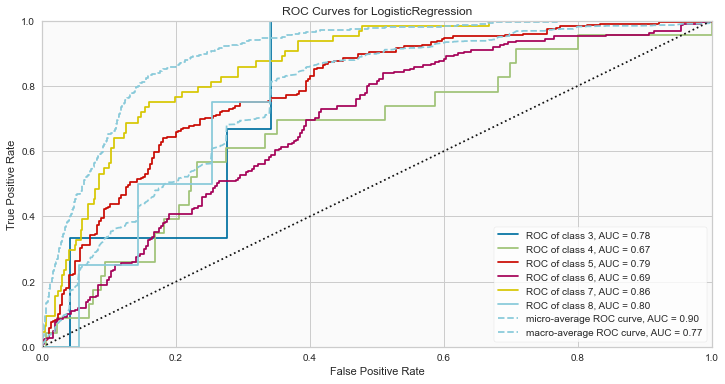

AxesSubplot(0.125,0.125;0.775x0.755)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        23
           5       0.66      0.71      0.69       228
           6       0.53      0.62      0.57       211
           7       0.49      0.30      0.37        64
           8       0.00      0.00      0.00         4

    accuracy                           0.59       533
   macro avg       0.28      0.27      0.27       533
weighted avg       0.55      0.59      0.56       533



In [9]:
WinePrediction_Log(df)

With Outlier Imputation

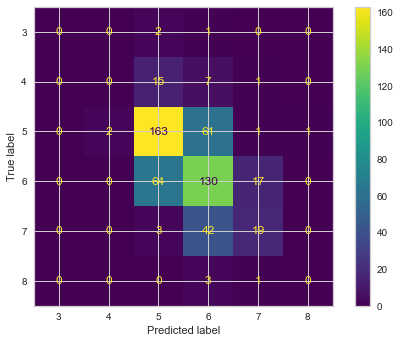

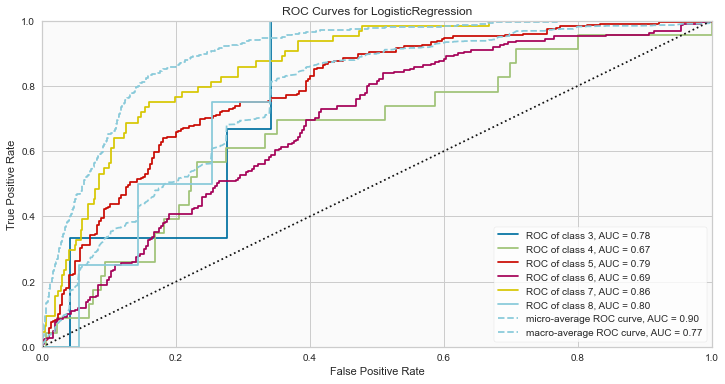

AxesSubplot(0.125,0.125;0.775x0.755)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        23
           5       0.66      0.71      0.69       228
           6       0.53      0.62      0.57       211
           7       0.49      0.30      0.37        64
           8       0.00      0.00      0.00         4

    accuracy                           0.59       533
   macro avg       0.28      0.27      0.27       533
weighted avg       0.55      0.59      0.56       533



In [10]:
WinePrediction_Log(df_outlierimputed)

<h2>Conclusion:</h2></br>
We Can observe multi-collinearity between the features Density and Citric Acid.Since Logistic Regression is prone to Multi-Collinearity it cannot give higer Accuracy

<b>Accuracy before Outlier imputation:59%</b></br>
<b>Accuracy before Outlier imputation:59%</b>

<h1>Decision Tree</h1>

In [15]:
def WinePrediction_DT(df):
    df1=df.copy()
    x = df1.drop('quality',axis=1).values     #creating the independent variables
    y = df1['quality'].values

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

    model = DecisionTreeClassifier(random_state=1)
    tree_param = {'criterion':['gini','entropy'],'max_depth':[10,11,12,15,20]}

    cv_rf = GridSearchCV(model, cv = 10,
                             param_grid=tree_param, 
                             n_jobs = 3)

        #Fitting the train set , so that grid search is executed on this dataset
    cv_rf.fit(x_train, y_train)

        #Printing the best parameters by using best_params
    print('Best Parameters using grid search: ', cv_rf.best_params_,'\n') 

        #Finally the best parameters are specified

    model.set_params(criterion = cv_rf.best_params_['criterion'],
                          max_depth = cv_rf.best_params_['max_depth'])

    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    accuracyscore = accuracy_score(y_test,y_pred)
    print('Accuracy Score for model is: ',accuracyscore,'\n')
    
    print(plot_confusion_matrix(model,x_test,y_test),'\n')
    
    print(classification_report(y_test,y_pred))

<b>Without Outlier imputation:</b>

Best Parameters using grid search:  {'criterion': 'gini', 'max_depth': 12} 

Accuracy Score for model is:  0.675 


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.15      0.18      0.17        11
           5       0.79      0.70      0.74       135
           6       0.70      0.71      0.70       142
           7       0.50      0.67      0.57        27
           8       0.00      0.00      0.00         3

    accuracy                           0.68       320
   macro avg       0.36      0.38      0.36       320
weighted avg       0.69      0.68      0.68       320



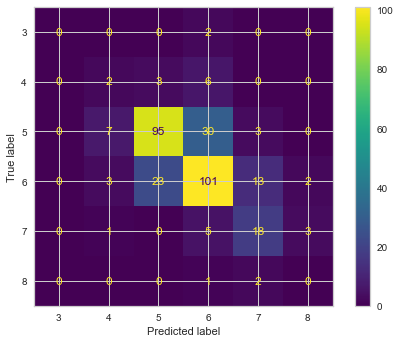

In [16]:
WinePrediction_DT(df)

<b>With outlier Imputation</b>

Best Parameters using grid search:  {'criterion': 'gini', 'max_depth': 12} 

Accuracy Score for model is:  0.675 


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.15      0.18      0.17        11
           5       0.79      0.70      0.74       135
           6       0.70      0.71      0.70       142
           7       0.50      0.67      0.57        27
           8       0.00      0.00      0.00         3

    accuracy                           0.68       320
   macro avg       0.36      0.38      0.36       320
weighted avg       0.69      0.68      0.68       320



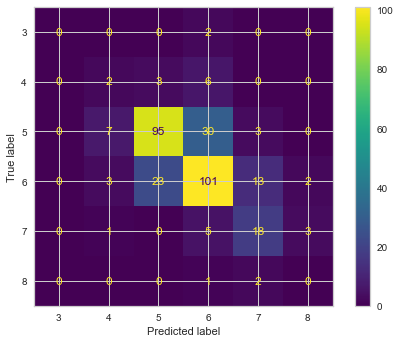

In [17]:
WinePrediction_DT(df_outlierimputed)

<h2>Conclusion</h2></br>
Desicion Tree is a good choice when we have multi collinearity since this model is not distance based.
We are getting better accuracy than the logistic regression.</br>

<b>Accuracy before Outlier imputation:68%</b></br>
<b>Accuracy before Outlier imputation:68%</b>

<h1>Random Forest</h1>

In [18]:
def RFClassifierModel(df):

    feature_space = df.iloc[:, df.columns != 'quality']
    feature_class = df.iloc[:, df.columns == 'quality']
    x_train, x_test, y_train, y_test = train_test_split(feature_space,
                                                                        feature_class,
                                                                        test_size = 0.20, 
                                                                        random_state = 0)
    fit_rf = RandomForestClassifier()


    # Providing the different values of hyperparameters
    param_dist = {'max_depth': [10,11,23,12],
                  'max_features': ['auto', 'sqrt', 'log2', None],
                    'bootstrap' : [True, False],
                  'criterion': ['gini', 'entropy']}

    # Running gridsearchCV to check for all the different PnCs of these parameter values
    cv_rf = GridSearchCV(fit_rf, cv = 10,
                         param_grid=param_dist, 
                         n_jobs = 3)

    #Fitting the train set , so that grid search is executed on this dataset
    cv_rf.fit(x_train, y_train)

    #Printing the best parameters by using best_params
    print('Best Parameters using grid search: ', cv_rf.best_params_,'\n') 

    #Finally the best parameters are specified

    fit_rf.set_params(criterion = cv_rf.best_params_['criterion'],
                      max_features = cv_rf.best_params_['max_features'], 
                      bootstrap = cv_rf.best_params_['bootstrap'], #False
                      max_depth = cv_rf.best_params_['max_depth'])

    fit_rf.fit(x_train, y_train)
    y_pred = fit_rf.predict(x_test)

    accuracy_rf = accuracy_score(y_test,y_pred)
    print("Accuracy: ",accuracy_rf,'\n')


    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(fit_rf, x_train, y_train, cv=5)
    print("scores: ",scores)


    print('scores_mean: ',scores.mean(),'\n')
    
    print(plot_confusion_matrix(fit_rf,x_test,y_test),'\n')
    
    print(classification_report(y_test,y_pred))

<b>Without Outlier Imputation</b>

Best Parameters using grid search:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 11, 'max_features': 'sqrt'} 

Accuracy:  0.73125 

scores:  [0.6015625  0.6328125  0.65234375 0.6484375  0.68627451]
scores_mean:  0.6442861519607843 


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.76      0.84      0.80       135
           6       0.75      0.73      0.74       142
           7       0.53      0.59      0.56        27
           8       0.00      0.00      0.00         3

    accuracy                           0.73       320
   macro avg       0.34      0.36      0.35       320
weighted avg       0.70      0.73      0.71       320



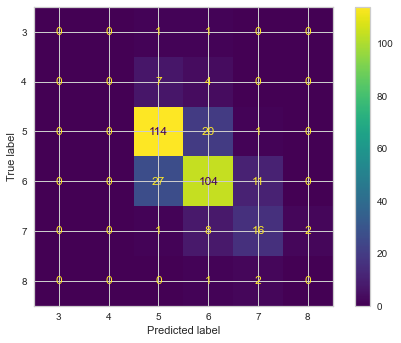

In [19]:
RFClassifierModel(df)

<b>With Outlier Imputation</b>

Best Parameters using grid search:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 11, 'max_features': 'sqrt'} 

Accuracy:  0.703125 

scores:  [0.61328125 0.6328125  0.65625    0.65625    0.67058824]
scores_mean:  0.6458363970588235 


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.73      0.82      0.77       135
           6       0.73      0.70      0.71       142
           7       0.50      0.56      0.53        27
           8       0.00      0.00      0.00         3

    accuracy                           0.70       320
   macro avg       0.33      0.35      0.34       320
weighted avg       0.67      0.70      0.69       320



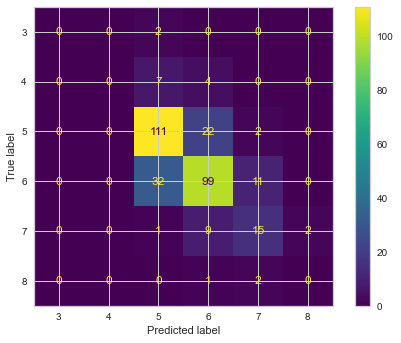

In [20]:
RFClassifierModel(df_outlierimputed)

<h2>Conclusion</h2></br>
Random Forest is a good choice when we have multi collinearity since this model is not distance based.This works on multiple Decision Trees
We are getting better accuracy than the Decision Tree.</br>

<b>Accuracy before Outlier imputation:73%</b></br>
<b>Accuracy before Outlier imputation:70%</b>

<h1>K-Nearest Neighbours</h1>

In [34]:
def WinePrediction_KNN(df):
    feature_space = df.iloc[:, df.columns != 'quality']
    feature_class = df.iloc[:, df.columns == 'quality']
    x_train, x_test, y_train, y_test = train_test_split(feature_space,
                                                                        feature_class,
                                                                        test_size = 0.10, 
                                                                        random_state = 0)


 #Scaling the independent variables

    standard_Scaler=StandardScaler()
    x_train = standard_Scaler.fit_transform(x_train)   #fit generates the parameters, transform applies 
    x_test = standard_Scaler.transform(x_test)
    
    knn = KNeighborsClassifier()
    
    # Providing the different values of hyperparameters
    param_dist = {'n_neighbors': [5,6,7,8]}

    # Running gridsearchCV to check for all the different PnCs of these parameter values
    cv_rf = GridSearchCV(knn, cv = 10,
                         param_grid=param_dist, 
                         n_jobs = 3)

    #Fitting the train set , so that grid search is executed on this dataset
    cv_rf.fit(x_train, y_train)

    #Printing the best parameters by using best_params
    print('Best Parameters using grid search: ', cv_rf.best_params_,'\n') 

    #Finally the best parameters are specified

    knn.set_params(n_neighbors = cv_rf.best_params_['n_neighbors'])

    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    
    print(plot_confusion_matrix(knn,x_test,y_test),'\n')
    
    print(classification_report(y_test,pred),'\n')
    
    accuracy_rate = []

# May take some time
    for i in range(1,40):
    
        knn = KNeighborsClassifier(n_neighbors=i)
        score=cross_val_score(knn,df,df['quality'],cv=10)
        accuracy_rate.append(score.mean())

        error_rate = []

# May take some time
    for i in range(1,40):
    
        knn = KNeighborsClassifier(n_neighbors=i)
        score=cross_val_score(knn,df,df['quality'],cv=10)
        error_rate.append(1-score.mean())
    
    plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

    plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
    plt.title('Accuracy Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Accuracy Rate')

    plt.figure(figsize=(10,6))
    plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

<b>Without Outlier Imputation</b>

In [ ]:
WinePrediction_KNN(df)

<b>With Outlier Imputation</b>


Best Parameters using grid search:  {'n_neighbors': 8} 


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.17      0.29         6
           5       0.61      0.77      0.68        64
           6       0.63      0.51      0.56        73
           7       0.30      0.43      0.35        14
           8       0.00      0.00      0.00         2

    accuracy                           0.58       160
   macro avg       0.42      0.31      0.31       160
weighted avg       0.59      0.58      0.57       160
 



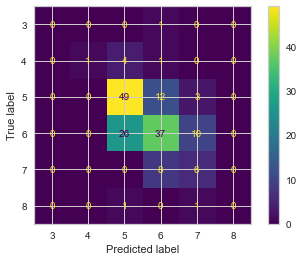

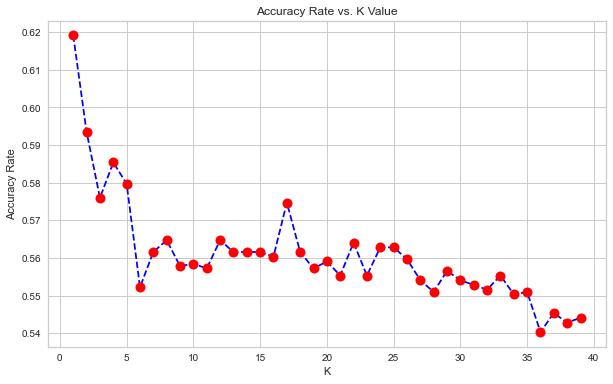

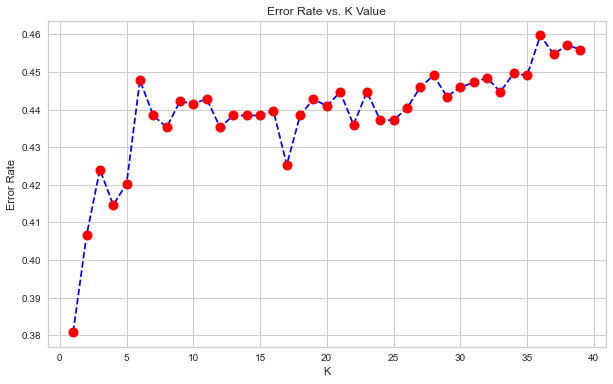

In [38]:
WinePrediction_KNN(df_outlierimputed)

<h2>Conclusion</h2></br>
<b>Accuracy before Outlier imputation:59%</b></br>
<b>Accuracy before Outlier imputation:58%</b>